In [22]:
import networkx as nx

In [23]:
class DisjointSetsSystem:
    """
    Система непересекающихся множеств с произвольными данными.
    Все один в один как в обычном DisjointSet, только тут
    self.parent и self.rank - словари, где ключи - наши данные(например буквы)
    В self.parent значения(родители) будут того же типа что и ключи(тоже буквами на этом примере)
    """

    def __init__(self):
        self.parent = dict()
        self.rank = dict()

    def make_set(self, elem):
        self.parent[elem] = elem
        self.rank[elem] = 0


    def find(self, elem):
        if elem != self.parent[elem]:
            self.parent[elem] = DisjointSetsSystem.find(self, self.parent[elem])
        return self.parent[elem]

    # при равных рангах вершина elem2 подвешивается к вершине elem1 (!)
    def union(self, elem1, elem2):
        id_1 = DisjointSetsSystem.find(self, elem1)
        id_2 = DisjointSetsSystem.find(self, elem2)
        if id_1 == id_2:
            return
        if self.rank[id_2] > self.rank[id_1]:
            self.parent[id_1] = id_2
        else:
            self.parent[id_2] = id_1
            if self.rank[id_1] == self.rank[id_2]:
                self.rank[id_1] += 1
    

In [24]:
def read_graph():
    n, m = map(int, input().split())
    G = {}
    # далее m строк: "А Б вес"
    for i in range(m):
        a, b, weight = input().split()
        weight = float(weight)
        add_edge(G, a, b, weight)
        add_edge(G, b, a, weight)
    return G

def add_edge(G, a, b, weight):
    # делаю словарь словарей смежности:
    if a not in G:
        G[a] = {b: weight}
    else:
        G[a][b] = weight

In [25]:
def test_graph():
    G = {'A': {'B': 7.0, 'D': 5.0},
         'B': {'A': 7.0, 'C': 8.0, 'D': 9.0, 'E': 7.0},
         'D': {'A': 5.0, 'B': 9.0, 'E': 15.0, 'F': 6.0},
         'C': {'B': 8.0, 'E': 5.0},
         'E': {'B': 7.0, 'C': 5.0, 'D': 15.0, 'F': 8.0, 'G': 9.0},
         'F': {'D': 6.0, 'E': 8.0, 'G': 11.0},
         'G': {'E': 9.0, 'F': 11.0}}
    G1 = {'A': {'B': 1, 'C': 10},
         'B': {'A': 1, 'C': 2},
         'C': {'A': 10, 'B': 2}}
    G2 = {'A': {'B': 1, 'C': 2},
         'B': {'A': 1, 'C': 3, 'D': 4, 'E': 2, 'G': 8},
         'C': {'A': 2, 'B': 3, 'E': 5},
         'D': {'B': 4, 'F': 3, 'G': 4, 'E': 6},
         'E': {'C': 5, 'B': 2, 'D': 6, 'G': 5, 'H': 5},
         'F': {'D': 3, 'G': 2},
         'G': {'F': 2, 'D': 4, 'B': 8, 'E': 5, 'H': 6},
         'H': {'G': 6, 'E': 5}}
    return G

In [26]:
def sort_edges(G):
    """
    Сортирует все ребра неориентированного графа по неубыванию веса
    """
    edges = []
    edges_1 = set()
    for vertex in G:
        for neighbour in G[vertex]:
            v = str(vertex)
            neigh = str(neighbour)
            edge1 = v + neigh
            edge2 = neigh + v
            weight = G[vertex][neighbour]
            if (edge1, weight) not in edges_1 and (edge2, weight) not in edges_1:
                edges.append((edge1, weight))
                edges_1.add((edge1, weight))
    edges.sort(key=lambda x: x[1])
    return edges

In [27]:
def min_spanning_tree(G):
    trees = DisjointSetsSystem()
    for vertex in G:
        trees.make_set(vertex)
    ans = []
    summ = []
    for edge in sort_edges(G):
        end1 = edge[0][0]
        end2 = edge[0][1]
        weight = edge[1]
        if trees.find(end1) != trees.find(end2):
            trees.union(end2, end1)
            ans.append(end1+end2)
            summ.append(weight)
#     print(int(sum(summ)))
    return ans




def main():
    G = read_graph()
    min_spanning_tree(G)


In [28]:
G = test_graph()

In [29]:
tree = min_spanning_tree(G)

In [30]:
tree

['AD', 'CE', 'DF', 'AB', 'BE', 'EG']

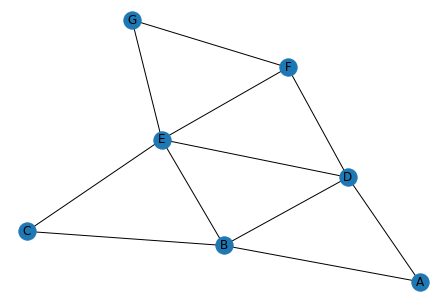

In [31]:
G = nx.Graph(G)
nx.draw(G, with_labels=True)

In [32]:
G.edges

EdgeView([('A', 'B'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('D', 'E'), ('D', 'F'), ('C', 'E'), ('E', 'F'), ('E', 'G'), ('F', 'G')])

**Выделяем ребра**

In [33]:
for e in G.edges:
    G[e[0]][e[1]]['color'] = 'black'
for e in tree:
    G[e[0]][e[1]]['color'] = 'red'

In [34]:
edge_color_list = [ G[e[0]][e[1]]['color'] for e in G.edges() ]

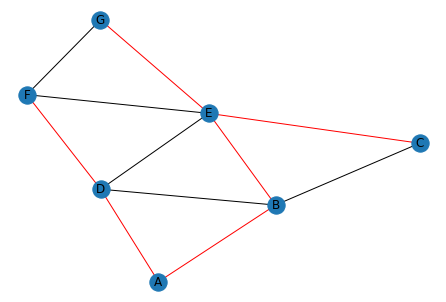

In [35]:
nx.draw(G, edge_color=edge_color_list, with_labels=True)

In [36]:
tree

['AD', 'CE', 'DF', 'AB', 'BE', 'EG']

In [37]:
G['A']['B']

{'color': 'red'}

In [38]:
edge_color_list

['red',
 'red',
 'black',
 'black',
 'red',
 'black',
 'red',
 'red',
 'black',
 'red',
 'black']

**Выделяем вершины**

In [40]:
G.nodes['G']['color'] = 'blue'

In [41]:
G.nodes['G']

{'color': 'blue'}

In [44]:
highlighted_nodes = ['A', 'B', 'C', 'D']

for n in G.nodes:
    G.nodes[n]['color'] = '0.5'
    
for n in highlighted_nodes:
    G.nodes[n]['color'] = 'red'
    
node_color_list = [ G.nodes[n]['color'] for n in G.nodes ]

In [45]:
node_color_list

['red', 'red', 'red', 'red', '0.5', '0.5', '0.5']

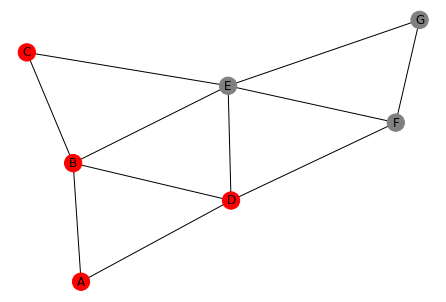

In [46]:
nx.draw(G, with_labels=True, node_color=node_color_list)